<a href="https://colab.research.google.com/github/datajluiz/An-lise-de-pessoas-desaparecidas-no-Rio-de-Janeiro/blob/master/An%C3%A1lise_de_pessoas_desaparecidas_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="20%" src="https://github.com/datajluiz/Luiz-Lucena/blob/master/banner.png?raw=true">

#### **Portifólio**
*by [Luiz Lucena](https://medium.com/@eng.zeluiz)*

---
 

## Análise de pessoas desaparecidas no Rio de Janeiro

<p align="center"><img src="https://www.sejusp.ms.gov.br/wp-content/uploads/2018/05/desaparecido.jpg" height="300px"></p>



O desaparecimento de uma pessoa é uma situação que traz grande pesar à familiares e amigos. Você já imaginou acontecer o desaparecimento de um ente querido? 

É uma realidade para milhares de famílias no Brasil e no mundo, familiares e amigos sofrem com a angústia e o sentimento do receio do que está acontecendo com o ente querido, não descansam enquanto não sabem o verdadeiro paradeiro, infelizmente algumas vezes o final não é feliz.

Pensando nesse assunto, resolvi realizar um estudo estatístico sobre esse tema.

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do portal [ISPDados](http://www.ispdados.rj.gov.br/) . Nesse projeto de ciências de dados , faremos uma análise em cima dos indicadores estatísticos de desaparecimento de pessoas no Rio de Janeiro, explorando algumas das variáveis fornecidas.

Ao verificar o desaparecimento de alguém, deve-se comunicar imediatamente à Polícia cívil, para que seja registrado um Boletim de Ocorrência.

Para quem quiser obter mais informações e ajudas sobre esse assunto, seguem sites realizando comentários e dicas importantes para o apoio nessa situação.


**Dica da Polícia Civil de São Paulo: Como agir em casos de pessoas desaparecidas**

https://www.sejusp.ms.gov.br/20020-2/


**Procedimentos em caso de desaparecimento e encontro de pessoas**

https://www.ssp.sp.gov.br/servicos/pessoas_desaparecidas.aspx



**Consultar cadastro de pessoas desaparecidas no Paraná**

https://www.pia.pr.gov.br/servicos/Seguranca/Desaparecidos/Consultar-cadastro-de-pessoas-desaparecidas-Dqo8GMrR

http://www.policiacivil.pr.gov.br/Pagina/Pessoas-desaparecidas

OBS: Sites de São Paulo e Paraná, porém os outros estados devem ter sites similares.



**COMITÊ INTERNACIONAL DA CRUZ VERMELHA**

https://www.icrc.org/pt/pessoasdesaparecidas-brasil



# **1.0 - Entendendo o projeto** 

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP, os ROs são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Vamos dedicar essa seção do projeto para investigar dados em relação ao desaparecimento de pessoas, esse tipo de acontecimento merece destaque em nosso projeto. Como temos dados sobre desaparecimento de pessoas, encontro de ossada e encontro de cadáveres, resolvi realizar esse estudo, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação citada.

## _*1.1 - Métodos abordados*_

Neste projeto iremos analisar os dados referentes à cidade do Rio de Janeiro e ver quais insights podem ser extraídos a partir desses dados brutos.

Iremos identificar os comportamentos médios e discrepantes dos casos de desaparecimentos de pessoas, encontro de ossadas e cadaveres, investigando a interdependência entre estas variáveis.

A partir do conjunto de dados iniciais , iremos aplicar os recursos computacionais através do Phyton e definir o que de fato é essencial e o que é lixo ( ausência ou erros nos dados). Utilizaremos as seguintes técnicas da análise exploratória:

- Histogramas;
- Mapa de calor;
- Heatmap.

A partir dessas análises encontraremos parâmetros para cada uma das variáveis do nosso projeto.

## _*1.2 - Quesitos analisados*_

- Pessoas desaparecidas;
- Encontro de ossada;
- Encontro de cadáveres 


# **2.0 - Obtenção dos Dados** 

Todos os dados usados aqui foram obtidos a partir do site [portal ISPDados](http://www.ispdados.rj.gov.br/).


No caso do *dataset* a ser utilizado, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

In [ ]:
# importando os pacotes necessários
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import folium



 
# configurando a visualização
sns.set_style()
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')


## _*2.1 - Análisando os Dados*_

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- vano;
- mes;
- hom_doloso;
- lesao_corp_morte;
- latrocinio;
- hom_por_interv_policial;
- tentat_hom;
- lesao_corp_dolosa;
- estupro;
- hom_culposo;
- lesao_corp_culposa;
- roubo_comercio, roubo_residencia, roubo_veiculo, roubo_carga,roubo_transeunte,roubo_em_coletivo, roubo_banco, roubo_cx_eletronico, roubo_celular,roubo_conducao_saque, roubo_apos_saque, roubo_bicicleta, outros_roubos total_roubos;
- furto_veiculos, furto_transeunte, furto_coletivo, furto_celular,      furto_bicicleta, outros_furtos e total_furtos;
- sequestro;
- extorsao;
- sequestro_relampago;
- estelionato;
- apreensao_drogas, posse_drogas, trafico_drogas, apreensao_drogas_sem_autor;
- recuperacao_veiculos;
- apf;
- aaapai;
- cmp;
- cmba;
- ameaca;
- pessoas_desaparecidas;
- encontro_cadaver, encontro_ossada;
- pol_militares_mortos_serv, pol_civis_mortos_serv;
- indicador_letalidade, indicador_roubo_rua, indicador_roubo_veic;
- registro_ocorrencias;
- fase.

In [ ]:
# imprimir os nomes das colunas

df.columns


Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
# ver as 5 primeiras entradas do dataset

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# ver as 5 últimas entradas do dataset

df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


### _*Quantificando as variáveis, entradas e tipos do nosso conjunto de dados*_

Vamos prosseguir e identificar a quantidade de entradas do conjunto de dados e ver os tipos das colunas.

Este *dataset* que baixamos possui 344 entradas e 56 variáveis.

In [ ]:
# Verificar tamanho do dataframe

print('Variaveis:', df.shape[1])

print('Entradas:', df.shape[0])

Variaveis: 56
Entradas: 344


In [ ]:
# ver os tipos das variáveis

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### _*Percentual de valores ausentes no *dataset**_

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `roubo_bicicleta` e 'furto_bicicleta' possui 80% dos seus valores faltantes acarretando 276;
* As variáveis 'apreensao_drogas_sem_autor', 'posse_drogas', 'apf', 'aaapai', 'cmp', 'trafico_drogas' e cmba possuem valores nulos / faltantes em quase metade das linhas;
* As variáveis 'pessoas_desaparecidas' e 'encontro_ossada' têm aproximadamente 38% dos valores nulos;
* A variável 'encontro_cadaver'está completa.

In [ ]:
# ver os valores faltantes das colunas
(df_mesano.isnull().sum()/ df_mesano.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
estelionato                   0.418605
furto_celular                 0.418605
sequestro_relampago           0.418605
furto_coletivo                0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
extorsao                      0.418605
estupro                       0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
ameaca                        0.279070
lesao_corp_morte              0.279070
sequestro                

In [ ]:
# mostrando a quantidade de dados ausentes por variável
(df_mesano.isnull().sum()).sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
estelionato                   144
furto_celular                 144
sequestro_relampago           144
furto_coletivo                144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
extorsao                      144
estupro                       144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
ameaca                         96
lesao_corp_morte               96
sequestro                      96
lesao_corp_culposa             96
registro_ocorrencias           96
hom_culposo                    84
hom_por_interv

In [ ]:
#Copia do dataset para um ajustado indexando mês e ano

df_mesano = df.copy()

df_mesano.set_index(['vano','mes'], inplace=True)


In [ ]:
df_mesano.head()

hom_doloso  lesao_corp_morte  ...  registro_ocorrencias  fase
vano mes                                ...                            
1991 1           657               NaN  ...                   NaN     3
     2           732               NaN  ...                   NaN     3
     3           713               NaN  ...                   NaN     3
     4           634               NaN  ...                   NaN     3
     5           650               NaN  ...                   NaN     3

[5 rows x 54 columns]

### _*Análise do tipo de distribuição das variáveis*_

Para identificar a distribuição das variáveis, irei plotar o histograma.

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Nos gráfico abaixo, alguns dados chamam a nossa atenção, registrados ao longo do período em estudo:

Seguem as análises:

  - Ocorreram quase 60 meses com 400-430 pessoas desaparecidas;
  - Quase 50 meses com 3-4 ossadas encontradas;
  - Quase 95 meses com 50-60 cadaveres encontrados.




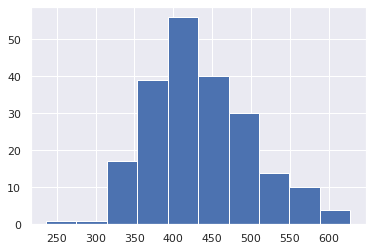

In [ ]:
# plotar histograma de Pessoas desaparecidas
df_mesano.pessoas_desaparecidas.hist()


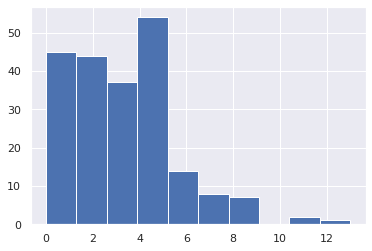

In [ ]:
df_mesano.encontro_ossada.hist()

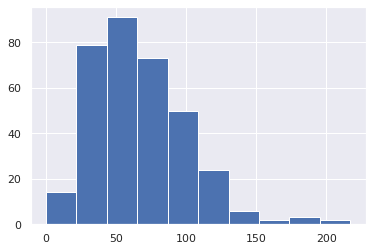

In [ ]:
df_mesano.encontro_cadaver.hist()

### _*Avaliação de outliers presentes*_

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras que nos auxiliam a detecção de outliers:

- Resumo estatístico por meio do método describe();
- Heatmap.

Irá nos dar uma melhor visualização dos valores ausentes.

Usando o método describe() podemos visualizar a distribuição estatística do dataframe.

Lembrem se que não realizei o tratamento de todos os dados faltantes ou  com erro, analisaremos somente as entradas dos assuntos que estamos analisando.

In [ ]:
df_mesano.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000,149.500000,13.000000,1154.000000,9243.500000,1637.500000,10

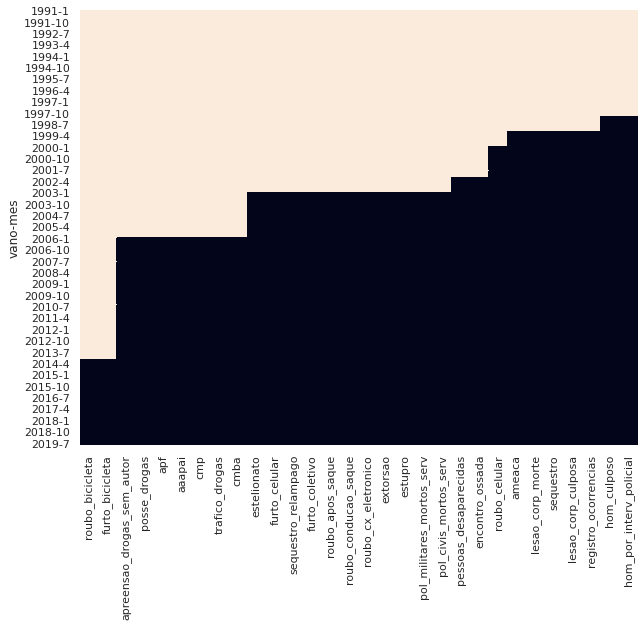

In [ ]:
#Soma os valores nulos de cada coluna, organiza por ordem do maior para o menor e divide-se pelo número total de linhas do dataset
nulos = df_mesano.isnull().sum().sort_values(ascending=False) / len(df)

#Retorna os 35 maiores valores
nulos.head(35)

#Converter para uma lista as colunas com valores ausentes
lista_nulos = nulos.loc[nulos != 0].index.to_list()

#Plotar um heatmap que separe os dados ausentes dos demais
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_mesano[lista_nulos].isnull(), cbar = False);

Percebe se que temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset, estarem ausentes não significa que não existiram.

Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, imagine no período mencionado.

Devemos levar em consideração também o formato em que esses dados eram registrados na época, será que foram registrados corretamente? perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foram com falhas? 

Ficam essas análises a se pensar.

# __3.0 Preparando os dados__

Nesta etapa iremos realizar a preparação dos dados e consequentemente a limpeza, realizando a integração, formatação e construção de novos dados, para que possamos selecionar os que serão utilizados na construção de nosso modelo (análise exploratória de dados).

## *3.1 Limpando os dados*

Podemos perceber que algumas das variáveis tem valores faltantes em proporções consideráveis, como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas.

Como os dados que iremos analisar são de pessoas desaparecidas, percebam que as variáveis **"pessoas_desaparecidas"** e **"encontro_ossada"** possuem 38% de dados faltantes, iremos abaixo realizar um tratamento desses dados usando uma média desses valores. 

A variável **'encontro_cadaver"** não iremos efetuar nenhuma alteração pois não possuem nenhum erro nos dados.

In [ ]:
pessoasdesaparecidas = df_mesano.pessoas_desaparecidas.median()  

df = df_mesano.fillna({'pessoas_desaparecidas': pessoasdesaparecidas, 'encontro_ossada':encontroossada}) 

In [ ]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
cmba                          0.523256
cmp                           0.523256
aaapai                        0.523256
apf                           0.523256
trafico_drogas                0.523256
furto_celular                 0.418605
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
furto_coletivo                0.418605
extorsao                      0.418605
sequestro_relampago           0.418605
estelionato                   0.418605
roubo_cx_eletronico           0.418605
pol_militares_mortos_serv     0.418605
estupro                       0.418605
pol_civis_mortos_serv         0.418605
roubo_celular                 0.313953
registro_ocorrencias          0.279070
lesao_corp_morte              0.279070
ameaca                        0.279070
lesao_corp_culposa            0.279070
sequestro                

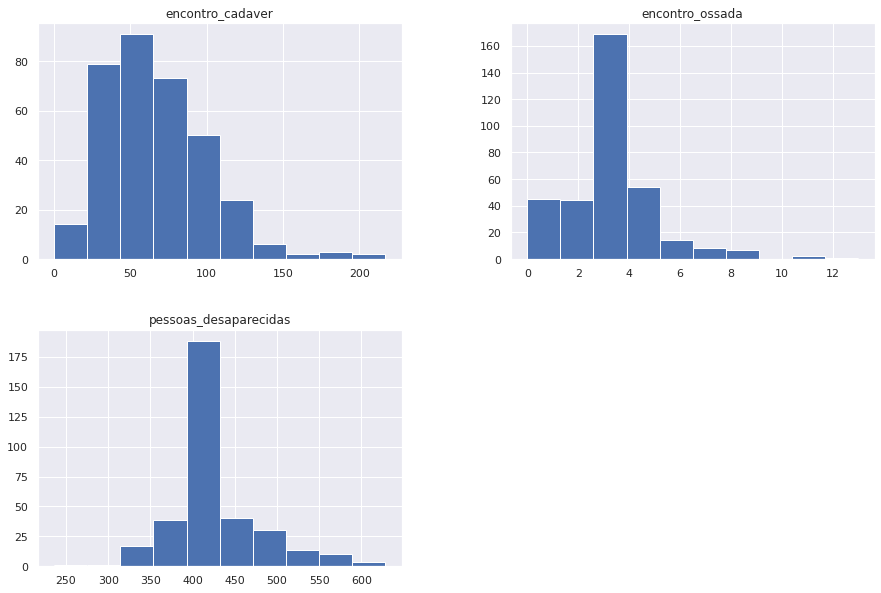

In [ ]:
df[["pessoas_desaparecidas", "encontro_cadaver", "encontro_ossada"]].hist(figsize=(15,10));

# **4 - Construindo o modelo do DS**

Nesta etapa iremos utilizar as técnicas de modelagem em Data Science. Construiremos possíveis modelos para nosso DS com a análise exploratória dos dados (tabelas, gráficos), outras técnicas disponíveis, e por fim, o modelo será avaliado quanto à qualidade das suas previsões (métricas de avaliação do modelo).


In [ ]:
# ver a média de encontro de cadáveres

media_encontrodecadaveres = df.encontro_cadaver.mean()

print('Média de encontro de cadáveres: {:.2f}'.format(media_encontrodecadaveres))



Média de encontro de cadáveres: 66.26


In [ ]:
# ver a média de encontro de ossada

media_encontrodeossada = df.encontro_ossada.mean()

print('Média de encontro de ossada: {:.2f}'.format(media_encontrodeossada))


Média de encontro de ossada: 3.19


In [ ]:
# ver a média de pessoas desaparecidas

media_pessoasdesaparecidas = df.pessoas_desaparecidas.mean()

print('Média de pessoas desaparecidas: {:.2f}'.format(media_pessoasdesaparecidas))

Média de pessoas desaparecidas: 432.01


In [ ]:

# total das pessoas desaparecias encontradas sem vida
total = media_encontrodecadaveres + media_encontrodeossada
print('Média de Pessoas Desaparecidas encontradas Sem Vida por Mês: {:.2f} '.format(total))
print('Pessoas desaparecidas por Mês: {:.2f}'.format(media_pessoasdesaparecidas))

# porcentagem de desaparecidas encontradas sem vida
pct = (total*100) / media_pessoasdesaparecidas

print('{:.2f}% das Pessoas desaparecidas encontradas sem vida.'.format(pct))

Média de Pessoas Desaparecidas encontradas Sem Vida por Mês: 69.45 
Pessoas desaparecidas por Mês: 432.01
16.08% das Pessoas desaparecidas encontradas sem vida.


In [ ]:
# valores max e min de pessoas desaparecidas
max_Pessoasdesaparecidas = df.pessoas_desaparecidas.max()
min_Pessoasdesaparecidas = df.pessoas_desaparecidas.min()

# imprimir os valores máximos e mínimos
print('Mês com menor desaparecimento de pessoas: {:.2f}'.format(min_Pessoasdesaparecidas))
print('Mês com maior desaparecimento de pessoas: {:.2f}'.format(max_Pessoasdesaparecidas))

Mês com menor desaparecimento de pessoas: 236.00
Mês com maior desaparecimento de pessoas: 628.00


In [ ]:
# verificando o mês com menor número de pessoas desaparecidas
df[df.pessoas_desaparecidas == 236]

,,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,2,503,4.0,26,85.0,452,2521,324.0,170.0,848.0,277,49,4286,452,2260,487,0,4.0,551.0,3.0,11.0,4.0,1330,9714,1310,663,167.0,527.0,39.0,3089,5795,0.0,49.0,8.0,717.0,1266,372.0,808.0,120.0,2307,2396.0,535.0,882.0,82.0,1409.0,236.0,39,1.0,1.0,0.0,618,3298,4286,31231.0,3


In [ ]:
# verificando o mês com maior número de pessoas desaparecidas
df[df.pessoas_desaparecidas == 628]

,,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,1,464,3.0,15,50.0,557,9050,555.0,194.0,4064.0,774,126,3206,489,6625,662,6,4.0,473.0,9.0,121.0,0.0,1275,13770,1638,3268,938.0,1538.0,0.0,9880,17262,0.0,178.0,31.0,3017.0,2356,1160.0,1012.0,219.0,2342,3095.0,1091.0,1494.0,47.0,9034.0,628.0,66,3.0,0.0,0.0,532,7760,3206,75403.0,3


### _*Visualização de Dados através de gráficos de linhas*_

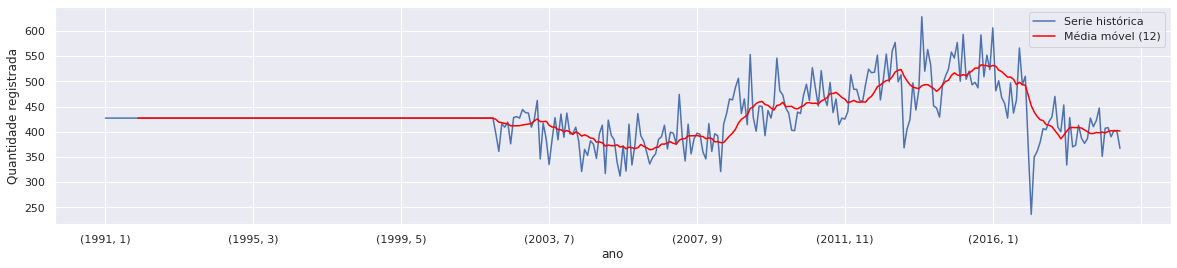

In [ ]:
#Define o tamanho das dimensões do gráfico
fig = plt.figure(figsize=(20,4))


df.pessoas_desaparecidas.plot(legend=True, label='Serie histórica')
df.pessoas_desaparecidas.rolling(12).mean().plot(legend=True, label='Média móvel (12)', color='red')
plt.xlabel('ano')
plt.ylabel('Quantidade registrada')
plt.savefig('pessoasdesaparecidas.png', dpi=400)
plt.show()

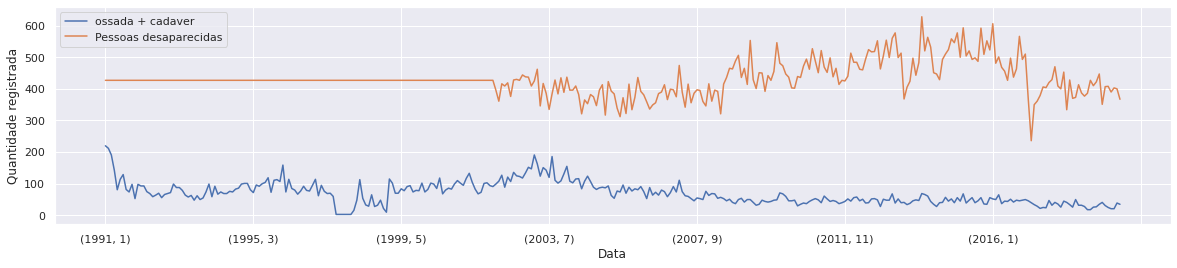

In [ ]:
#Define tamanho as dimensões do gráfico
fig = plt.figure(figsize=(20,4))

#Soma a quantidade de ossada e cadaver do período

ossada_e_cadaver = df.encontro_ossada+df.encontro_cadaver 


ossada_e_cadaver.name = 'ossada + cadaver'
df.pessoas_desaparecidas.name = 'Pessoas desaparecidas'
ossada_e_cadaver.plot(legend=True);
df.pessoas_desaparecidas.plot(legend=True);
plt.xlabel('Data');
plt.ylabel('Quantidade registrada');
plt.savefig('ossadacadaver.png', dpi=400)
plt.show()


# **5 - Conclusões**

Foram realizadas apenas umas análises superficiais na base de dados do governo do Rio de Janeiro através do portal [ISPDados](http://www.ispdados.rj.gov.br/), porém  percebe se que existem *outliers* em algumas das variáveis. 

Com nossa análise chegamos as seguintes conclusões:

1 - Média mensal de 66,26 cadáveres encontrados;

![texto alternativo](https://github.com/datajluiz/An-lise-de-pessoas-desaparecidas-no-Rio-de-Janeiro/blob/master/m%C3%A9dia%20desaparecidas.JPG?raw=true)

2 - Média mensal de 3,19 ossada encontrada;

3 - Média mensal de 432,1 Pessoas desaparecidas;

4 - Média de Pessoas Desaparecidas encontradas Sem Vida por Mês: 69.45;

5 - 16.07% das Pessoas desaparecidas são encontradas sem vida (nos casos específicos de encontro de cadaveres e ossadas);

![texto alternativo](https://github.com/datajluiz/An-lise-de-pessoas-desaparecidas-no-Rio-de-Janeiro/blob/master/relacao%20vivas.JPG?raw=true)

6 - Fevereiro de 2017 foi o mês que desapareceram o menor número de pessoas (236)

7 -Janeiro de 2014 a maior quantidade (628). 



Isso sugere um bom sinal, indicando que, talvez, o desaparecimento de pessoas venha diminuindo, apenas uma análise mais aprofundada pode nos dizer.